# Hybrid Recommender System - MovieLens

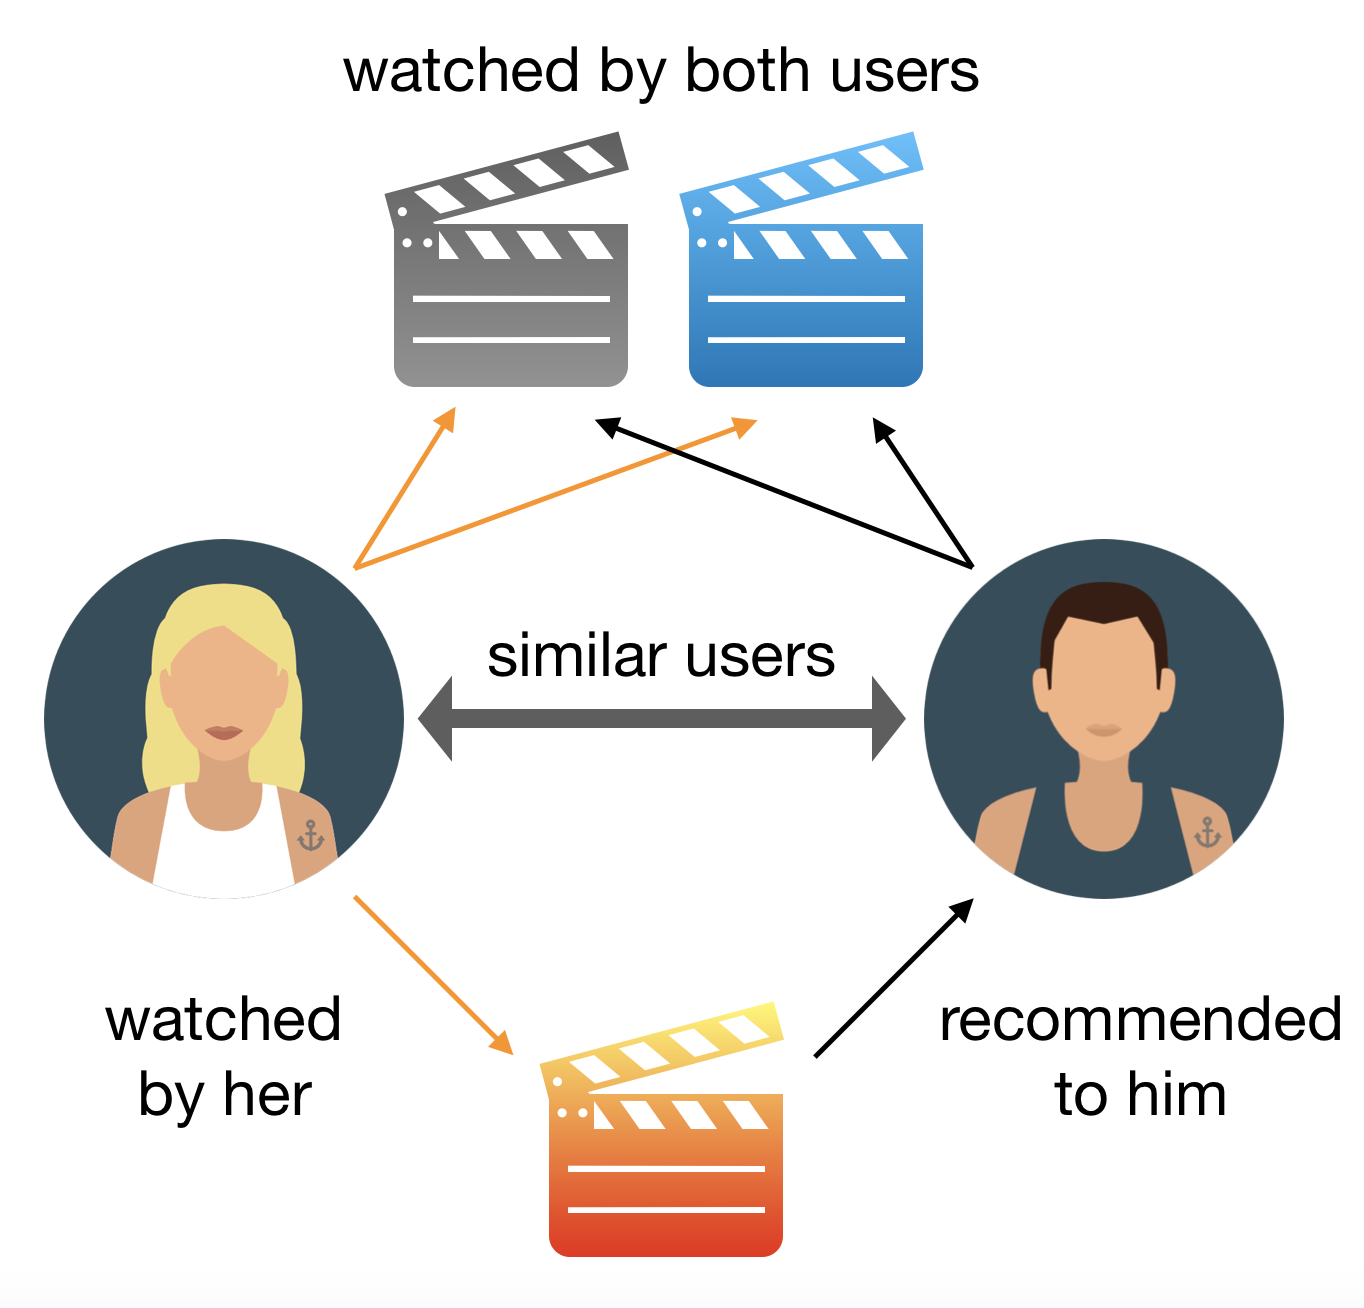

A recommendation system is a technique for filtering information that determines the degree of evaluation that a user will give to a particular item.

The following types of recommender systems are very popular:

Association Rule Learning<br>
Content Based Recommendation<br>
Collaborative Filtering<br>
User-based<br>
Item-based<br>
Model-based (Matrix Factorization)<br>

In this study, I made a movie recommendation using both item-based and user-based recommender methods.

### Business problem:

Suggesting 10 movies for users using item-based and user-based recommender methods.

#### Dataset Story:

The dataset was provided by MovieLens, a movie recommendation service. It contains movies and their rating scores.
There are 2,000,0263 ratings on 27,278 movies in the dataset. This data set was created on October 17, 2016. Includes 138,493 users and data from 09 January 1995 to 31 March 2015. Users are randomly selected. It is known that all selected users voted for at least 20 movies.

**movie.csv**

**movieId:** Unique movie number.<br>
**title:** Movie name<br>
**genres:** Genre

**rating.csv**

**userid:** Unique user number. (UniqueID)<br>
**movieId:** Unique movie number. (UniqueID)<br>
**rating:** The rating given to the movie by the user<br>
**timestamp:** Date of evaluation

## 1. Importing the Libraries and Uploading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.expand_frame_repr', False)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("movie_lens_dataset/movie.csv")
df1.head()

movieId                               title                                       genres
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy
2        3             Grumpier Old Men (1995)                               Comedy|Romance
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance
4        5  Father of the Bride Part II (1995)                                       Comedy

In [3]:
df2 = pd.read_csv("movie_lens_dataset/rating.csv")
df2.head()

userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

In [4]:
df = df1.merge(df2, how="left", on="movieId").sort_values("userId") # merge the datasets
df.head()

movieId                                      title                                             genres  userId  rating            timestamp
16653106     6807  Monty Python's The Meaning of Life (1983)                                             Comedy     1.0     3.5  2005-04-02 23:31:26
17111919     7438                   Kill Bill: Vol. 2 (2004)                              Action|Drama|Thriller     1.0     4.0  2005-04-02 23:33:09
15917038     5679                           Ring, The (2002)                            Horror|Mystery|Thriller     1.0     3.5  2004-09-10 03:15:08
14573561     4306                               Shrek (2001)  Adventure|Animation|Children|Comedy|Fantasy|Ro...     1.0     4.0  2004-09-10 03:09:44
8198569      1584                             Contact (1997)                                       Drama|Sci-Fi     1.0     3.5  2004-09-10 03:07:36

## 2. General Information About Dataset

In [5]:
def gen_info(df, box=True, column="rating"):
    print(30*"#" + "Shape".center(30) + 30*"#")
    print(df.shape)
    print("\n"+ 30*"#" + "Types".center(30) + 30*"#")
    print(df.dtypes)
    print("\n"+ 30*"#" + "Head".center(30) + 30*"#")
    print(df.head())
    print("\n"+ 30*"#" + "Tail".center(30) + 30*"#")
    print(df.tail())
    print("\n"+ 30*"#" + "Missing Values".center(30) + 30*"#")
    print(df.isnull().sum())
    print("\n"+ 30*"#" + "Quantiles".center(30) + 30*"#")
    print(df.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T)
    print("\n"+ 30*"#" + "BOX PLOT".center(30) + 30*"#")
    if box == True:
        sns.boxplot(x=df[column])
        print(plt.show())

##############################            Shape             ##############################
(20000797, 6)

##############################            Types             ##############################
movieId        int64
title         object
genres        object
userId       float64
rating       float64
timestamp     object
dtype: object

##############################             Head             ##############################
          movieId                                      title                                             genres  userId  rating            timestamp
16653106     6807  Monty Python's The Meaning of Life (1983)                                             Comedy     1.0     3.5  2005-04-02 23:31:26
17111919     7438                   Kill Bill: Vol. 2 (2004)                              Action|Drama|Thriller     1.0     4.0  2005-04-02 23:33:09
15917038     5679                           Ring, The (2002)                            Horror|Mystery|Thriller     1.0     

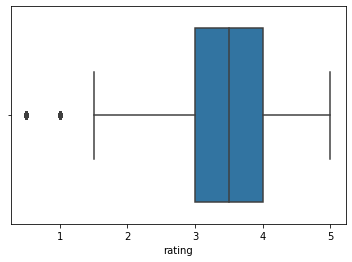

None


In [6]:
gen_info(df)

## 3. Data Preparation

Keep the names of the films with less than 1000 votes in the list and remove them from the data set.

In [7]:
comment_counts = pd.DataFrame(df["title"].value_counts())
comment_counts[comment_counts["title"] <= 1000]

title
One Night at McCool's (2001)               999
Bear, The (Ours, L') (1988)                999
Ted (2012)                                 999
Rosewood (1997)                            999
Marked for Death (1990)                    998
...                                        ...
Tales from the Organ Trade (2013)            1
Butcher Boys (Bone Boys) (2012)              1
Last Call, The (Tercera Llamada) (2013)      1
Wartorn: 1861-2010 (2010)                    1
Mo (1983)                                    1

[24103 rows x 1 columns]

In [8]:
rare_movies = comment_counts[comment_counts["title"] <= 1000].index
common_movies = df[~df["title"].isin(rare_movies)]

In [9]:
pd.DataFrame(common_movies["title"].value_counts())

title
Pulp Fiction (1994)                67310
Forrest Gump (1994)                66172
Shawshank Redemption, The (1994)   63366
Silence of the Lambs, The (1991)   63299
Jurassic Park (1993)               59715
...                                  ...
Scanners (1981)                     1003
Pet Sematary II (1992)              1003
Return to Paradise (1998)           1003
Lincoln Lawyer, The (2011)          1001
Wristcutters: A Love Story (2006)   1001

[3159 rows x 1 columns]

We have 3159 movies with higher than 1000 votes in the dataframe

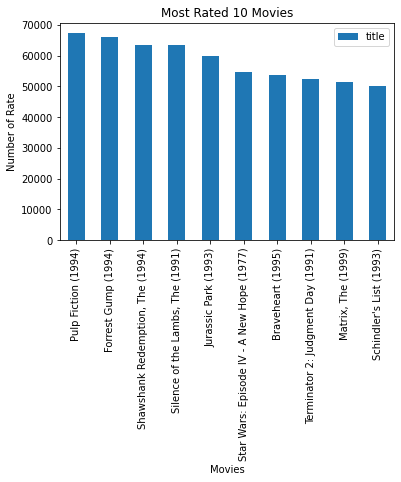

In [10]:
pd.DataFrame(common_movies["title"].value_counts()).head(10).plot(kind="bar")
plt.title("Most Rated 10 Movies")
plt.xlabel("Movies")
plt.ylabel("Number of Rate")
plt.show()

#### Create a pivot table for the dataframe with the userIDs in the index, the movie names in the columns, and the ratings as values.

In [11]:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

In [12]:
user_movie_df

title     'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splen

#### Before we continue let's make a function for doing all the steps till now

In [13]:
def create_user_movie_df():
    import pandas as pd
    movie = pd.read_csv("movie_lens_dataset/movie.csv")
    rating = pd.read_csv("movie_lens_dataset/rating.csv")
    df = movie.merge(rating, how="left", on="movieId")
    comment_counts = pd.DataFrame(df["title"].value_counts())
    rare_movies = comment_counts[comment_counts["title"] <= 1000].index
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df

In [14]:
user_movie_df = create_user_movie_df()

In [15]:
user_movie_df

title     'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splen

## 4. Determining the Movies Watched by the User to Make a Suggestion

Let's choose a random User Id

In [16]:
random_user = int(pd.Series(user_movie_df.index).sample(1).values)
random_user

72052

Let's create a new dataframe named random_user_df consisting of observation units of the selected user.

In [17]:
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df

title    'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splend

Let's assign the movies voted by the selected user to a list called movies_watched

In [18]:
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
movies_watched

['Aladdin (1992)',
 'Apollo 13 (1995)',
 'Aristocats, The (1970)',
 'Batman (1989)',
 'Beauty and the Beast (1991)',
 'Beauty of the Day (Belle de jour) (1967)',
 'Braveheart (1995)',
 'Breaking the Waves (1996)',
 'Candidate, The (1972)',
 'Cliffhanger (1993)',
 'Dances with Wolves (1990)',
 'Die Hard: With a Vengeance (1995)',
 'Firm, The (1993)',
 'Flintstones, The (1994)',
 'Forrest Gump (1994)',
 'Fugitive, The (1993)',
 'Ghost (1990)',
 'Heavy Metal (1981)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Island of Dr. Moreau, The (1996)',
 'Jurassic Park (1993)',
 'Lion King, The (1994)',
 'Miracle on 34th Street (1994)',
 'Mrs. Doubtfire (1993)',
 'Naked Gun 33 1/3: The Final Insult (1994)',
 'Natural Born Killers (1994)',
 'Pinocchio (1940)',
 'Pocahontas (1995)',
 'Pretty Woman (1990)',
 'Pulp Fiction (1994)',
 "Schindler's List (1993)",
 'Snow White and the Seven Dwarfs (1937)',
 'Stargate (1994)',
 'Tin Drum, The (Blechtrommel, Die) (1979)',
 'Trainspotting (1996)',
 'True Lies 

In [19]:
# controlling one of the movie
user_movie_df.loc[user_movie_df.index == random_user,
                  user_movie_df.columns == "Schindler's List (1993)"] # it is indeed 5 stat movie :)

title    Schindler's List (1993)
userId                          
72052.0                      5.0

In [20]:
len(movies_watched) # User reviewed 39 movies in total

39

## 5. Accessing the Data and Ids of Other Users Watching the Same Movies

In [21]:
movies_watched_df = user_movie_df[movies_watched] # we just brought our 39 watched movies to the columns
movies_watched_df

title     Aladdin (1992)  Apollo 13 (1995)  Aristocats, The (1970)  Batman (1989)  Beauty and the Beast (1991)  Beauty of the Day (Belle de jour) (1967)  Braveheart (1995)  Breaking the Waves (1996)  Candidate, The (1972)  Cliffhanger (1993)  Dances with Wolves (1990)  Die Hard: With a Vengeance (1995)  Firm, The (1993)  Flintstones, The (1994)  Forrest Gump (1994)  Fugitive, The (1993)  Ghost (1990)  Heavy Metal (1981)  Independence Day (a.k.a. ID4) (1996)  Island of Dr. Moreau, The (1996)  Jurassic Park (1993)  Lion King, The (1994)  Miracle on 34th Street (1994)  Mrs. Doubtfire (1993)  Naked Gun 33 1/3: The Final Insult (1994)  Natural Born Killers (1994)  Pinocchio (1940)  Pocahontas (1995)  Pretty Woman (1990)  Pulp Fiction (1994)  Schindler's List (1993)  Snow White and the Seven Dwarfs (1937)  Stargate (1994)  Tin Drum, The (Blechtrommel, Die) (1979)  Trainspotting (1996)  True Lies (1994)  Twister (1996)  Waterworld (1995)  Wolf (1994)
userId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1.0                  NaN               NaN                     NaN            NaN                          NaN                                       NaN                NaN                        NaN                    NaN                 NaN                        NaN                                NaN               NaN                      NaN                  NaN                   NaN           NaN                 NaN                                   NaN                               NaN                   NaN                    NaN                            NaN                    NaN                                        NaN                          NaN               NaN                NaN                  NaN                  4.0                      NaN                                     NaN              NaN                                       NaN                   NaN               NaN             NaN                NaN          NaN
2.0                  NaN               NaN                     NaN            NaN                          NaN                                       NaN                4.0                        NaN                    NaN                 NaN                        NaN                                NaN               NaN                      NaN                  NaN                   NaN           NaN                 NaN                                   NaN                               NaN                   5.0                    NaN                            NaN                    NaN                                        NaN                          NaN               NaN                NaN                  NaN                  NaN                      NaN                                     NaN              NaN                                       NaN                   NaN               NaN             NaN                NaN          NaN
3.0                  NaN               NaN                     NaN            NaN                          NaN                                       NaN                

Let's find out how many of the 39 movies have been watched on a user basis.

In [22]:
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count

userId
1.0          1
2.0          2
3.0          5
4.0          8
5.0         17
            ..
138489.0     0
138490.0     7
138491.0     0
138492.0     0
138493.0    20
Length: 138493, dtype: int64

In [23]:
user_movie_count = user_movie_count.reset_index()
user_movie_count

userId   0
0            1.0   1
1            2.0   2
2            3.0   5
3            4.0   8
4            5.0  17
...          ...  ..
138488  138489.0   0
138489  138490.0   7
138490  138491.0   0
138491  138492.0   0
138492  138493.0  20

[138493 rows x 2 columns]

In [24]:
user_movie_count.columns = ["userId", "movie_count"]
user_movie_count

userId  movie_count
0            1.0            1
1            2.0            2
2            3.0            5
3            4.0            8
4            5.0           17
...          ...          ...
138488  138489.0            0
138489  138490.0            7
138490  138491.0            0
138491  138492.0            0
138492  138493.0           20

[138493 rows x 2 columns]

Let's proceed through those who watch at least 60% of the movies watched by the user we selected

In [25]:
perc = len(movies_watched) * 60 / 100 
users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
users_same_movies

7              8.0
28            29.0
33            34.0
68            69.0
90            91.0
            ...   
138403    138404.0
138410    138411.0
138473    138474.0
138482    138483.0
138483    138484.0
Name: userId, Length: 6685, dtype: float64

## 6. Determining the Users Most Similar to the User to be Suggested

In [26]:
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])
final_df.head()

title   Aladdin (1992)  Apollo 13 (1995)  Aristocats, The (1970)  Batman (1989)  Beauty and the Beast (1991)  Beauty of the Day (Belle de jour) (1967)  Braveheart (1995)  Breaking the Waves (1996)  Candidate, The (1972)  Cliffhanger (1993)  Dances with Wolves (1990)  Die Hard: With a Vengeance (1995)  Firm, The (1993)  Flintstones, The (1994)  Forrest Gump (1994)  Fugitive, The (1993)  Ghost (1990)  Heavy Metal (1981)  Independence Day (a.k.a. ID4) (1996)  Island of Dr. Moreau, The (1996)  Jurassic Park (1993)  Lion King, The (1994)  Miracle on 34th Street (1994)  Mrs. Doubtfire (1993)  Naked Gun 33 1/3: The Final Insult (1994)  Natural Born Killers (1994)  Pinocchio (1940)  Pocahontas (1995)  Pretty Woman (1990)  Pulp Fiction (1994)  Schindler's List (1993)  Snow White and the Seven Dwarfs (1937)  Stargate (1994)  Tin Drum, The (Blechtrommel, Die) (1979)  Trainspotting (1996)  True Lies (1994)  Twister (1996)  Waterworld (1995)  Wolf (1994)
userId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
8.0                3.0               4.0                     NaN            4.0                          3.0                                       NaN                5.0                        NaN                    NaN                 5.0                        5.0                                3.0               4.0                      2.0                  5.0                   5.0           4.0                 4.0                                   NaN                               NaN                   4.0                    4.0                            4.0                    4.0                                        NaN                          5.0               NaN                4.0                  5.0                  5.0                      5.0                                     NaN              2.0                                       NaN                   NaN               4.0             NaN                3.0          NaN
29.0               4.0               4.0                     3.0            4.0                          4.0                                       NaN                5.0                        NaN                    NaN                 4.0                        4.0                                4.0               NaN                      3.0                  5.0                   3.0           3.0                 4.0                                   NaN                               NaN                   5.0                    4.0                            3.0                    3.0                                        3.0                          3.0               5.0                NaN                  3.0                  5.0                      4.0                                     4.0              3.0                                       NaN                   NaN               3.0             NaN                3.0          3.0
34.0               4.0               5.0                     NaN            4.0                          5.0                                       NaN                NaN       

In [27]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates() # finding correlations
corr_df

userId    userId  
88010.0   133324.0   -0.913510
15802.0   104352.0   -0.897397
109693.0  132032.0   -0.895523
86804.0   116446.0   -0.891340
30329.0   110166.0   -0.890049
                        ...   
106474.0  71683.0     0.981711
27053.0   35460.0     0.984152
41235.0   113081.0    0.987872
72052.0   72052.0     1.000000
8.0       1376.0           NaN
Length: 16360132, dtype: float64

In [28]:
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df

user_id_1  user_id_2      corr
0           88010.0   133324.0 -0.913510
1           15802.0   104352.0 -0.897397
2          109693.0   132032.0 -0.895523
3           86804.0   116446.0 -0.891340
4           30329.0   110166.0 -0.890049
...             ...        ...       ...
16360127   106474.0    71683.0  0.981711
16360128    27053.0    35460.0  0.984152
16360129    41235.0   113081.0  0.987872
16360130    72052.0    72052.0  1.000000
16360131        8.0     1376.0       NaN

[16360132 rows x 3 columns]

Let's create a new dataframe named top_users by filtering out the users that have a high correlation (over 0.65) with the selected user.

In [29]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][
    ["user_id_2", "corr"]].reset_index(drop=True)
top_users

user_id_2      corr
0     12710.0  0.651301
1     91310.0  0.651705
2     37711.0  0.655027
3    111177.0  0.655426
4     50360.0  0.655698
..        ...       ...
46    80494.0  0.783383
47   118632.0  0.790157
48    80951.0  0.797168
49    80951.0  0.797168
50    72052.0  1.000000

[51 rows x 2 columns]

In [30]:
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users

userId      corr
50   72052.0  1.000000
49   80951.0  0.797168
48   80951.0  0.797168
47  118632.0  0.790157
46   80494.0  0.783383
..       ...       ...
4    50360.0  0.655698
3   111177.0  0.655426
2    37711.0  0.655027
1    91310.0  0.651705
0    12710.0  0.651301

[51 rows x 2 columns]

let's bring the movies to our dataframe

In [31]:
top_users_ratings = top_users.merge(df2[["userId", "movieId", "rating"]], how='inner')
top_users_ratings

userId      corr  movieId  rating
0      72052.0  1.000000       48     3.0
1      72052.0  1.000000      110     4.0
2      72052.0  1.000000      150     5.0
3      72052.0  1.000000      154     4.0
4      72052.0  1.000000      165     3.0
...        ...       ...      ...     ...
30063  12710.0  0.651301    80100     3.0
30064  12710.0  0.651301    80107     1.0
30065  12710.0  0.651301    80139     3.0
30066  12710.0  0.651301    80350     1.0
30067  12710.0  0.651301    80617     2.5

[30068 rows x 4 columns]

delete our random user from dataframe

In [32]:
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user] 
top_users_ratings

userId      corr  movieId  rating
40     80951.0  0.797168        1     5.0
41     80951.0  0.797168        2     3.0
42     80951.0  0.797168        5     3.0
43     80951.0  0.797168        6     4.0
44     80951.0  0.797168       17     4.0
...        ...       ...      ...     ...
30063  12710.0  0.651301    80100     3.0
30064  12710.0  0.651301    80107     1.0
30065  12710.0  0.651301    80139     3.0
30066  12710.0  0.651301    80350     1.0
30067  12710.0  0.651301    80617     2.5

[30028 rows x 4 columns]

## 7. Calculating Weighted Average Recommendation Score and Keeping Top 5 Recommended Movies

Let's create a new variable named weighted_rating, which is the product of the corr and rating values of each user.

In [33]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings

userId      corr  movieId  rating  weighted_rating
40     80951.0  0.797168        1     5.0         3.985840
41     80951.0  0.797168        2     3.0         2.391504
42     80951.0  0.797168        5     3.0         2.391504
43     80951.0  0.797168        6     4.0         3.188672
44     80951.0  0.797168       17     4.0         3.188672
...        ...       ...      ...     ...              ...
30063  12710.0  0.651301    80100     3.0         1.953903
30064  12710.0  0.651301    80107     1.0         0.651301
30065  12710.0  0.651301    80139     3.0         1.953903
30066  12710.0  0.651301    80350     1.0         0.651301
30067  12710.0  0.651301    80617     2.5         1.628252

[30028 rows x 5 columns]

Let's create a new dataframe called recommendation_df that contains the movie id and the average value of the weighted ratings of all users of each movie.

In [34]:
recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df

movieId  weighted_rating
0           1         2.758294
1           2         2.221993
2           3         1.809217
3           4         1.429404
4           5         1.723997
...       ...              ...
6285   111759         2.849691
6286   112556         2.957111
6287   112852         2.849691
6288   114723         2.688123
6289   116797         2.849691

[6290 rows x 2 columns]

Let's select movies with a weighted rating greater than 3.5 in recommendation_df and sort them by weighted rating.

In [35]:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.5]. \
sort_values("weighted_rating", ascending=False)
movies_to_be_recommend.head()

movieId  weighted_rating
6222   100714         3.985840
5273    55721         3.985840
384       495         3.692279
6258   105504         3.607124
5706    73290         3.587256

Fetching the movie names from the movie dataset and select the top 5 movies to recommend.

In [36]:
movies_to_be_recommend.head().merge(df1[["movieId", "title"]]) # we did our user-based recommendation :)

movieId  weighted_rating                                              title
0   100714         3.985840                             Before Midnight (2013)
1    55721         3.985840                Elite Squad (Tropa de Elite) (2007)
2      495         3.692279  In the Realm of the Senses (Ai no corrida) (1976)
3   105504         3.607124                            Captain Phillips (2013)
4    73290         3.587256  Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's ...

#### Bonus: Let's change weighted_rating calculation and check how the recommendation changing

In [37]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * \
top_users_ratings['rating'] * top_users_ratings['rating'] # corr * rating^2 (we give much more weight to rating score)
top_users_ratings

userId      corr  movieId  rating  weighted_rating
40     80951.0  0.797168        1     5.0        19.929202
41     80951.0  0.797168        2     3.0         7.174513
42     80951.0  0.797168        5     3.0         7.174513
43     80951.0  0.797168        6     4.0        12.754689
44     80951.0  0.797168       17     4.0        12.754689
...        ...       ...      ...     ...              ...
30063  12710.0  0.651301    80100     3.0         5.861708
30064  12710.0  0.651301    80107     1.0         0.651301
30065  12710.0  0.651301    80139     3.0         5.861708
30066  12710.0  0.651301    80350     1.0         0.651301
30067  12710.0  0.651301    80617     2.5         4.070631

[30028 rows x 5 columns]

In [38]:
recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.5]. \
sort_values("weighted_rating", ascending=False)
movies_to_be_recommend.head()

movieId  weighted_rating
5273    55721        19.929202
6222   100714        19.929202
384       495        18.461396
611       932        17.867687
3242     6031        17.867687

In [39]:
movies_to_be_recommend.head().merge(df1[["movieId", "title"]]) # movie recommendation changed

movieId  weighted_rating                                              title
0    55721        19.929202                Elite Squad (Tropa de Elite) (2007)
1   100714        19.929202                             Before Midnight (2013)
2      495        18.461396  In the Realm of the Senses (Ai no corrida) (1976)
3      932        17.867687                      Affair to Remember, An (1957)
4     6031        17.867687                           Imitation of Life (1959)

## 8. Make an item-based suggestion based on the most recent and highest rated movie the user has watched.

In [40]:
df.head()

movieId                                      title                                             genres  userId  rating            timestamp
16653106     6807  Monty Python's The Meaning of Life (1983)                                             Comedy     1.0     3.5  2005-04-02 23:31:26
17111919     7438                   Kill Bill: Vol. 2 (2004)                              Action|Drama|Thriller     1.0     4.0  2005-04-02 23:33:09
15917038     5679                           Ring, The (2002)                            Horror|Mystery|Thriller     1.0     3.5  2004-09-10 03:15:08
14573561     4306                               Shrek (2001)  Adventure|Animation|Children|Comedy|Fantasy|Ro...     1.0     4.0  2004-09-10 03:09:44
8198569      1584                             Contact (1997)                                       Drama|Sci-Fi     1.0     3.5  2004-09-10 03:07:36

Let's get the id of the movie with the most recent score from the movies that the selected user gave 5 points.

In [41]:
df[(df["userId"] == random_user) & (df["rating"] == 5.0)].sort_values("timestamp", ascending = False).head(1)

movieId                    title     genres   userId  rating            timestamp
3505794      527  Schindler's List (1993)  Drama|War  72052.0     5.0  1996-11-10 15:38:31

In [42]:
movie_name = "Schindler's List (1993)"

Let's filter the user_movie_df dataframe created in the User based recommendation section according to the selected movie id.

In [43]:
user_movie_df

title     'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splen

In [44]:
movie_name = user_movie_df[movie_name]

In [45]:
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

title
Schindler's List (1993)       1.000000
Band of Brothers (2001)       0.462028
Saving Private Ryan (1998)    0.438793
Pianist, The (2002)           0.370002
Philadelphia (1993)           0.362108
Intouchables (2011)           0.359551
Hotel Rwanda (2004)           0.356555
Gandhi (1982)                 0.345513
Color Purple, The (1985)      0.345412
Rain Man (1988)               0.345187
dtype: float64

giving the first 5 movies as suggestions, except for the selected movie itself.

In [46]:
user_movie_df.corrwith(movie_name).sort_values(ascending=False)[1:6]

title
Band of Brothers (2001)       0.462028
Saving Private Ryan (1998)    0.438793
Pianist, The (2002)           0.370002
Philadelphia (1993)           0.362108
Intouchables (2011)           0.359551
dtype: float64

Hope it will be useful :)

[Linkedin](https://www.linkedin.com/in/demir-zumrut/)